<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2023, Day 3 </h1> 
<h3 align="center"> August 22, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> The Questions </h2>
    
<p> The first week of the course is devoted to question focused workshops and addresing those questions with datasets and computational methods that we will present.  Each day will be devoted to its own question.  
    
<p> For reference, the questions (as they are currently formulated) are
<ul>
<li> Day 1:  How do single neurons encode information about the external world?  
<li> Day 2:  How do populations of neurons encode information about the external world? 
<b><li> Day 3:  How do cell type and circuit architecture contribute to physiological function?</b>
<li> Day 4:  What is a behavioral state and how can we define it? 
<li> Day 5:  How does network structure lead to network dynamics?
</ul>

# Notebook to explore the EM-microns structure dataset for clustering into cell types
- First, we will test out feature extraction (add reference to CSM paper)
- Then, we will use a set of pre-extracted features for excitatory cells to run clustering methods and visualization methods

Begin by relevant imports

In [1]:
import skel_features
from standard_transform import minnie_ds
import pandas as pd
import numpy as np
from scipy import stats
import umap

# dir handling
import os

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# We will import other sklearn packages as needed

# Directories
skel_dir = './data/exampleNets/'
feature_dir = './data/features/'

#
height_bnds =  [0, 950] # pyr cells from minnie_ds

In [2]:
# get dataframe of pt root ids

path = skel_dir
dir_list = os.listdir(path)

In [3]:
df = pd.DataFrame()
df['FileName'] = dir_list
df['pt_root_id'] = df.FileName.str.split('.').str[0]

In [4]:
df

,FileName,pt_root_id
0,864691135759684174.h5,864691135759684174
1,864691136953057759.h5,864691136953057759
2,864691135866737541.h5,864691135866737541
3,864691134965653279.h5,864691134965653279
4,864691135208968313.h5,864691135208968313
5,864691136452201983.h5,864691136452201983


In [5]:
success = skel_features.extraction.extract_features_mp(
    df['pt_root_id'],
    skel_dir,
    height_bnds,
    minnie_ds,
    feature_dir,
)

In [6]:
raw_df = skel_features.io_utils.load_features(df['pt_root_id'], feature_dir)

In [7]:
raw_df

,root_id,soma_depth,tip_len_dist_dendrite,tip_tort_dendrite,num_syn_dendrite,num_syn_soma,syn_size_distribution_soma,syn_size_distribution_dendrite,syn_dist_distribution_dendrite,syn_depth_dist_all,radial_extent_dendrite,path_length_dendrite,branches_dist,path_length_depth_dendrite,syn_count_depth_dendrite,radius_dist,area_factor,egocentric_bins,success
0,864691135759684174,528.813122,"[171.38219106197357, 160.25944602489471, 121.0...","[1.1586309767041063, 1.1646684707530388, 1.194...",1574,58,"[1480, 4880, 304, 2204, 7508, 2484, 12968, 123...","[2744, 1056, 13660, 11592, 11684, 4892, 1312, ...","[49.50704701244831, 48.69468003511429, 71.6437...","[1453.4647743575003, 1423.3537085020955, 1413....",138.761907,2560.9116,"[8, 16, 17, 19, 14, 5, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",285.665094,2.098871,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True
1,864691136953057759,356.806247,"[416.74737975001335, 143.6246661543846, 148.13...","[2.047346526254667, 1.2312777054066923, 1.1604...",6342,124,"[7548, 7932, 1796, 2568, 2428, 3748, 580, 5424...","[436, 5236, 3684, 27320, 3320, 5252, 2516, 229...","[338.747542232275, 78.83717350661755, 112.9719...","[713.7710825828062, 957.6758747723087, 970.087...",106.261049,5395.4565,"[10, 30, 39, 29, 6, 1, 5, 7, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",358.661419,2.583286,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True
2,864691135866737541,612.445249,"[224.0852010846138, 537.7276720916852, 196.066...","[1.2607418220528916, 1.1773445120178199, 1.303...",10017,183,"[3472, 3664, 2508, 352, 320, 5092, 2088, 8892,...","[3016, 5192, 3824, 6072, 20112, 164, 2224, 530...","[39.69131834805012, 125.12996938824654, 95.766...","[1620.4905764332084, 1519.3464674010393, 1701....",164.161775,7407.0830,"[11, 33, 44, 47, 32, 12, 10, 6, 2, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",381.674543,2.314130,"[0, 0, 0, 0, 0, 0, 1, 27, 95, 117, 118, 95, 59]",True
3,864691134965653279,400.933177,"[131.30307346582413, 109.50995272397995, 156.5...","[1.098698876755629, 1.126261868078907, 1.57380...",1011,71,"[4044, 5420, 4504, 4676, 5968, 312, 3316, 3712...","[1024, 3036, 17648, 1748, 4044, 5420, 1364, 31...","[109.31147441267967, 147.72343334555626, 108.7...","[1164.0173988295596, 1121.7583905776887, 1208....",108.233691,2153.3474,"[8, 15, 15, 13, 5, 2, 4, 6, 4, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",274.873008,2.189993,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True
4,864691135208968313,273.835171,"[225.5098706409335, 265.01997950673103, 191.61...","[1.1672691556382564, 1.32709635205845, 1.11357...",5677,81,"[1928, 7664, 7792, 22792, 2704, 2060, 2384, 11...","[1116, 1116, 15712, 2172, 3860, 15908, 404, 78...","[103.20000171661377, 136.32630813121796, 68.87...","[745.5122715427226, 915.5355879056606, 775.477...",165.593065,5379.8564,"[18, 38, 39, 36, 14, 13, 11, 4, 2, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",338.601297,2.583297,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True
5,864691136452201983,471.287501,"[131.5290850996971, 144.04563464224339, 123.07...","[1.1109501600446055, 1.1405892690233788, 1.370...",4333,122,"[2108, 5148, 3324, 2724, 1084, 6460, 5440, 598...","[2048, 4228, 16660, 1152, 2388, 4140, 14088, 3...","[101.71838700771332, 113.60989382863045, 126.2...","[1312.0504761591956, 1356.1120786541019, 1323....",106.966933,3092.1120,"[10, 21, 25, 20, 6, 4, 4, 4, 2, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",339.197336,2.521659,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True


In [8]:
# The feature assembly code below - show why this won't work? Or not demo this at all....

In [9]:
(
    feat_df,
    feat_cols,
    syn_pca,
    br_svd,
    keep_depth,
    ego_pca,
    scalers,
) = skel_features.assembly.assemble_features_from_data(
    raw_df.dropna(), n_syn_comp=6, n_branch_comp=3, n_syn_ego=5
)

feat_df = feat_df.dropna()

/Users/anamika.agrawal/allenResearch/swdb_2023/Day3_data_scripts/skel_features/assembly.py:89: RuntimeWarning: invalid value encountered in true_divide
  pl_dat_norm = pl_dat / np.atleast_2d(pl_dat.sum(axis=1)).T


ValueError: Input X contains NaN.
SparsePCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
# read features from existing csv files
feat_df = pd.read_csv('./data/excitatory_properties.csv')

In [11]:
feat_df.columns

Index(['Unnamed: 0', 'pt_root_id', 'soma_depth', 'tip_len_dist_dendrite_p50',
       'tip_tort_dendrite_p50', 'num_syn_dendrite', 'num_syn_soma',
       'path_length_dendrite', 'radial_extent_dendrite',
       'syn_dist_distribution_dendrite_p50', 'syn_size_distribution_soma_p50',
       'syn_size_distribution_dendrite_p50',
       'syn_size_distribution_dendrite_dyn_range', 'syn_depth_dist_p5',
       'syn_depth_dist_p95', 'syn_depth_extent', 'max_density', 'radius_dist',
       'syn_count_pca0', 'syn_count_pca1', 'syn_count_pca2', 'syn_count_pca3',
       'syn_count_pca4', 'syn_count_pca5', 'branch_svd0', 'branch_svd1',
       'branch_svd2', 'ego_count_pca0', 'ego_count_pca1', 'ego_count_pca2',
       'ego_count_pca3', 'ego_count_pca4', 'classification_system',
       'cell_type_manual', 'has_ct_axon', 'umap0', 'umap1', 'm_type',
       'cell_id'],
      dtype='object')

# UMAP visualization superimposed with manual cell types

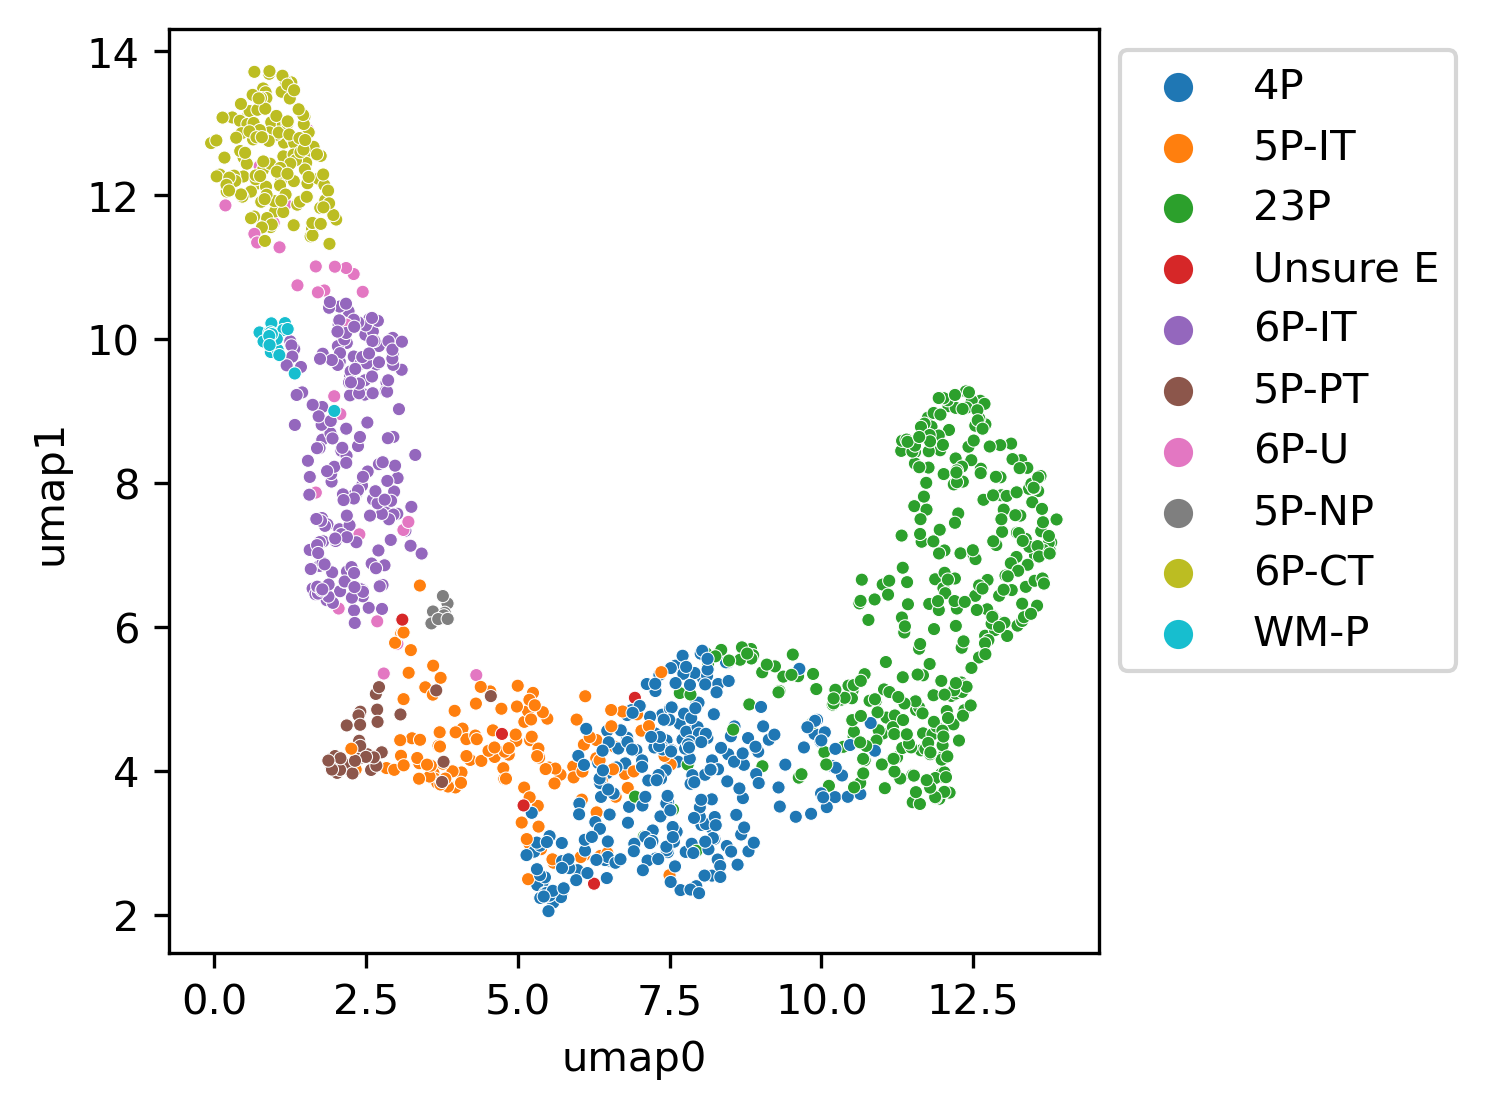

In [12]:

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(
    x="umap0",
    y="umap1",
    data=feat_df,
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="umap0",
    y="umap1",
    data=feat_df.query('cell_type_manual != "Unsure I"'),
    s=10,
    hue="cell_type_manual",
    #palette={
        #"PYC": [0.3, 0.3, 0.3],
        #"BC": (0.0, 0.10980392156862745, 0.4980392156862745),
        #"BPC": (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
        #"MC": (0.5490196078431373, 0.03137254901960784, 0.0),
        #"NGC": (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
    #},
    
)

ax.legend().set_bbox_to_anchor((1,1))

In [13]:
# test k-means for cell-type categorization - visualize on reduced data
from sklearn.cluster import KMeans
reduced_data = feat_df[["umap0", "umap1"]].copy().to_numpy()
# also try pca-reduced data

# how many clusters? 
n_celltypes = 10
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].




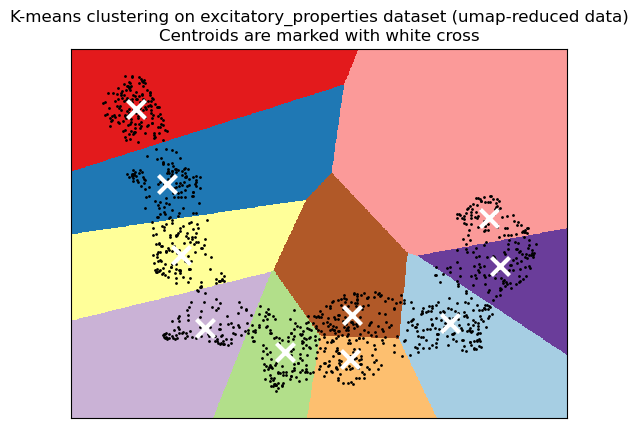

In [14]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on excitatory_properties dataset (umap-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


# K-means doesn't work very well here - structures are more continuously varying, eg for RNAseq it might be better

In [15]:
# fit k-means on all features
# retain numeric features
reduced_for_kmeans = feat_df.copy()
reduced_for_kmeans.drop(['Unnamed: 0','pt_root_id','classification_system',
       'cell_type_manual', 'has_ct_axon', 'umap0', 'umap1', 'm_type',
       'cell_id'], axis=1, inplace=True)
# how many clusters? 
n_celltypes = 10
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans.fit(reduced_for_kmeans)


KMeans(n_clusters=10, n_init=4)

In [ ]:
# Visualize these clusters - on umap data as we did for manual cell types

### stopped here ###

In [26]:
import phenograph

from sklearn import ensemble, model_selection

In [27]:
from xgboost import XGBClassifier
from bidict import bidict

bst = XGBClassifier(n_estimators=10, max_depth=7, learning_rate=1, objective='binary:logistic')

In [28]:
model_selection.cross_validate(
    bst,
    feat_df.dropna(subset='cell_type')[feat_cols_nospace],
    feat_df.dropna(subset='cell_type')['is_exc'],
    cv=5,
)

KeyError: ['cell_type']